**Estudiante 1:** Julian Andres Mendez Melo  201920623 

**Estudiante 2:** Omar Esteban Vargas Salamanca 201921271

**Estudiante 3:** María Alejandra Vargas Torres 201123148 

# ISIS 3301 - Inteligencia de Negocios
****
## Proyecto - Parte 1 

## Caso de estudio 


## Tabla de Contenido
----
### 1. Entendimiento de los datos[→](#Entendimiento)
- 1.1. Importar librerías.
- 1.2. Carga de datos.
- 1.3. Perfilamiento y entendimiento de datos.

### 2. Preparación de los datos - Calidad de los datos [→](#Transformacion)
- 2.1. Funciones de limpieza de datos.
- 2.2. Tokenización.
- 2.3. Selección de campos.

### 3. Modelo de MultinomialNB [→](#MultinomialNB)
- 3.1. Vectorización de palabras.
- 3.2. Modelo MultinomialNB.
- 3.3. Analísis de resultados
- 3.4. Generación de pipeline.

### 4. Modelo de Support Vector Machine [→](#Red Neuronal)
- 4.1. Vectorización de palabras.
- 4.2. Modelo Red neuronal.
- 4.3. Analísis de resultados
- 4.4. Generación de pipeline.

### 5. Modelo de AdaBoostClassifier [→](#Regresión Logística)
- 5.1. Vectorización de palabras.
- 5.2. Modelo Regresión logística.
- 5.3. Analísis de resultados
- 5.4. Generación de pipeline.

### 6. Numero de caracteres con arboles de decisión 
- 6.1. Selección de campos.
- 6.2. Modelo Arbol de decisión.

### 7. Conclusión de algoritmos
### 8. Datos Test


## 1. Entendimiento de los datos
----
### 1.1. Importación de librerías
En este caso se importan librerías para reconocer los textos en español ya uqe en el diccionario se especifica el idioma, en caso de que el conjunto de datos tenga otro idioma, estas columnas se deben eliminar. 



In [112]:
# Detectar el lenguaje en el que está escrito
from langdetect import detect

# Instalación de librerias
import pandas as pd
import numpy as np
from numpy import round
import sys
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import time
from IPython.core.display import HTML
from joblib import dump, load
from sklearn.model_selection import KFold

# Perfilamiento de los datos
import ydata_profiling as ydata
from sklearn.preprocessing import Binarizer

# Estadística descriptiva
from scipy import stats as st

# Procesamiento de texto
import re, string, unicodedata
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
from num2words import num2words
from collections import Counter
import spacy
from nltk.stem import SnowballStemmer

# Modelo
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.models import Model

# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer


In [3]:
# Función eliminar ocurrencias de un dato

def delete_one(df: pd.DataFrame, column: str, data: str):
    """
    Función que elimina las ocurrencias de un dato  

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame al que se le realizan los cambios
    column : str
        Columna del DataFrame en la que se realizarán los cambios
    mayor : float
        Límite máximo 
        
    Returns
    -------
        DtaFrame: DataFrame transformado 
    """
    df_data = df[df[column] != data]
    return df_data 

In [4]:
def changeValues(df: pd.DataFrame, column: str, old_data, new_data):
    """
    Función que cambia un valor especificado a otro dentro de una columna 

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame al que se le realizan los cambios
    column : str
        Columna del DataFrame en la que se realizarán los cambios
    old_data : str | bool | int
        Dato actual que se encuentra en el DataFrame
    new_data : str | bool | int
        Dato que nuevo que se va a introducir dentro del DataFrae
        
    Returns
    -------
        None
    """
    df.loc[df[column] == old_data, column] = new_data
    return df    

In [5]:
# Función eliminar datos null

def delete_null(df: pd.DataFrame, column: str):
    """
    Función que elimina los datos nulos 

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame al que se le realizan los cambios
    column : str
        Columna del DataFrame en la que se realizarán los cambios
           
    Returns
    -------
        DtaFrame: DataFrame transformado 
    """
    return df[df[column].notna()]

In [6]:
def duplicates(df_data: pd.DataFrame, column: str):
    """
    Función que elimina los duplicados 

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame al que se le realizan los cambios
    column : str
        Columna del DataFrame en la que se realizarán los cambios
           
    Returns
    -------
        DtaFrame: DataFrame transformado 
    """
    return df_data.drop_duplicates(subset = column, keep = 'first', inplace = True)

In [7]:
def del_id_column(df_data):
    return df_data.drop(df_data.columns[0], axis = 1)

### 1.2. Carga de Datos
En este caso la columna *Unnamed* se decide eliminarla ya que no afecta el modelo.

In [8]:
# Paso 1: Carga de los datos 
data = pd.read_csv('./Datos/MovieReviews.csv', sep=',')
data.head()

,Unnamed: 0,review_es,sentimiento
0,0,Si está buscando una película de guerra típica...,positivo
1,1,Supongo que algunos directores de películas de...,positivo
2,2,Es difícil contarle más sobre esta película si...,positivo
3,3,"La película comienza muy lentamente, con el es...",positivo
4,4,Esta película es verdadera acción en su máxima...,positivo


In [9]:
# Paso 2: Eliminar la columna del id de la review 
df_data = data.drop(data.columns[0], axis = 1).copy()
df_data.head()

,review_es,sentimiento
0,Si está buscando una película de guerra típica...,positivo
1,Supongo que algunos directores de películas de...,positivo
2,Es difícil contarle más sobre esta película si...,positivo
3,"La película comienza muy lentamente, con el es...",positivo
4,Esta película es verdadera acción en su máxima...,positivo


### 1.3. Perfilamiento y entendimiento de los datos 

In [10]:
# Paso 1: Dimensiones del DataFrame

Filas = df_data.shape[0]
Columnas = df_data.shape[1]
Filas, Columnas

(5000, 2)

In [11]:
# Paso 2: Adjuntar al DataFrame las estadísticas descriptivas de cada fila
df_data['Conteo'] = [len(x) for x in df_data['review_es']]
df_data['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in df_data['review_es']]
df_data['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in df_data['review_es']]
df_data['Language'] = [detect(x) for x in df_data['review_es']]
df_data.head()

,review_es,sentimiento,Conteo,Max,Min,Language
0,Si está buscando una película de guerra típica...,positivo,1104,15,1,es
1,Supongo que algunos directores de películas de...,positivo,1280,16,1,es
2,Es difícil contarle más sobre esta película si...,positivo,876,17,1,es
3,"La película comienza muy lentamente, con el es...",positivo,1446,16,1,es
4,Esta película es verdadera acción en su máxima...,positivo,738,11,1,es


In [12]:
# Paso 3: Generar el perfilamiento
#profile = ProfileReport(df_data)

In [13]:
#profile.to_file('./text.html')

In [14]:
# Paso 4: Identificar que cumpla con las restricciones del diccionario
df_data['Language'].value_counts()

es    4803
en     196
id       1
Name: Language, dtype: int64

Con el reporte realizado y evaluando la columna de *Languge* se identifica que hay texto que no se encuentra en español, teniendo así que eliminarlo para que se cumpla con la restricción dada en el diccionario.

In [15]:
# Paso 5: Eliminar las filas que no cumplen con las restricciones del negocio
df_data = delete_one(df_data, 'Language', 'en')
df_data = delete_one(df_data, 'Language', 'id')


In [16]:
# Paso 6: Comprobación
df_data['Language'].value_counts()

es    4803
Name: Language, dtype: int64

In [17]:
# Paso 7: Evlaluación de la completitud de los datos
(df_data.isnull().sum() / Filas).sort_values(ascending = False)

review_es      0.0
sentimiento    0.0
Conteo         0.0
Max            0.0
Min            0.0
Language       0.0
dtype: float64

In [18]:
# Paso 9: Elimar y dejar solo una de las ocurrencias 
df_data.drop_duplicates(subset = 'review_es', keep = 'first', inplace = True)

In [19]:
# Paso 10: Comprobación
df_data.duplicated(subset = 'review_es', keep = False).sum()

0

In [20]:
df_data.describe()

,Conteo,Max,Min
count,4801.000000,4801.000000,4801.000000
mean,1334.838159,16.698188,1.008540
std,916.698157,4.647618,0.092026
min,60.000000,8.000000,1.000000
25%,751.000000,15.000000,1.000000
50%,1025.000000,16.000000,1.000000
75%,1652.000000,18.000000,1.000000
max,5538.000000,108.000000,2.000000


## 2. Preparación de los datos
----

### 2.1. Funciones de limpieza de datos
Se definenen las funciones para el procesamiento de las palabras tokenizadas, entre estas:
1. Remover los caracteres que no sean ASCII.
2. Pasar todas las palabras a minúscula.
3. Remover la puntuación.
4. Reemplazar los números por su correspondiente textual.
5. Remover las stop_words o palabras vacías.  

In [21]:
#nltk.download() | !python -m nltk.downloader all
# Paso 1: Se crean las funciones para el procesamiento de las filas
from nltk.stem.snowball import SpanishStemmer
stop_words = set(stopwords.words('spanish'))

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', ' ', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    
    for word in words:
        new_word = re.findall('(\d+)', word)
        if new_word == []:
            new_words.append(word)
        else:
            new_word = new_word[0]
            new_word = num2words(int(new_word), lang='es')
            new_words.append(new_word)
            
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if (word not in stop_words):
            new_words.append(word)
    return new_words

def remove_blank_space(words):
    new_words = []
    for word in words:
        if (word != " "):
            new_words.append(word)
        else:
            None
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_blank_space(words)
    words = remove_stopwords(words)

    return words


### 2.2. Tokenización

En esta se dividen las oraciones en palabras, esto con el fin de desglozaar las palabras correctamente para su posterior análisis. 

In [22]:
# Paso 1: Se realiza la tokenización con las funciones anteriores
df_data['palabras'] = df_data['review_es'].apply(word_tokenize).apply(preprocessing)
df_data.head()

,review_es,sentimiento,Conteo,Max,Min,Language,palabras
0,Si está buscando una película de guerra típica...,positivo,1104,15,1,es,"[si, buscando, pelicula, guerra, tipica, asi, ..."
1,Supongo que algunos directores de películas de...,positivo,1280,16,1,es,"[supongo, directores, peliculas, lujo, sentado..."
2,Es difícil contarle más sobre esta película si...,positivo,876,17,1,es,"[dificil, contarle, mas, pelicula, estropearla..."
3,"La película comienza muy lentamente, con el es...",positivo,1446,16,1,es,"[pelicula, comienza, lentamente, estilo, vida,..."
4,Esta película es verdadera acción en su máxima...,positivo,738,11,1,es,"[pelicula, verdadera, accion, maxima, expresio..."


In [23]:
# Paso 2: Se encuentra la palabra que más se repite
df_data['Moda'] =  [Counter(x).most_common(1)[0][0] for x in df_data['palabras']]
df_data.head()

,review_es,sentimiento,Conteo,Max,Min,Language,palabras,Moda
0,Si está buscando una película de guerra típica...,positivo,1104,15,1,es,"[si, buscando, pelicula, guerra, tipica, asi, ...",pelicula
1,Supongo que algunos directores de películas de...,positivo,1280,16,1,es,"[supongo, directores, peliculas, lujo, sentado...",
2,Es difícil contarle más sobre esta película si...,positivo,876,17,1,es,"[dificil, contarle, mas, pelicula, estropearla...",mas
3,"La película comienza muy lentamente, con el es...",positivo,1446,16,1,es,"[pelicula, comienza, lentamente, estilo, vida,...",wallace
4,Esta película es verdadera acción en su máxima...,positivo,738,11,1,es,"[pelicula, verdadera, accion, maxima, expresio...",


In [24]:
# Paso 3: Se une el texto 
df_data['palabras'] = df_data['palabras'].apply(lambda x: ' '.join(map(str, x)))
df_data.head()

,review_es,sentimiento,Conteo,Max,Min,Language,palabras,Moda
0,Si está buscando una película de guerra típica...,positivo,1104,15,1,es,si buscando pelicula guerra tipica asi nota af...,pelicula
1,Supongo que algunos directores de películas de...,positivo,1280,16,1,es,supongo directores peliculas lujo sentados bus...,
2,Es difícil contarle más sobre esta película si...,positivo,876,17,1,es,dificil contarle mas pelicula estropearla lo d...,mas
3,"La película comienza muy lentamente, con el es...",positivo,1446,16,1,es,pelicula comienza lentamente estilo vida walla...,wallace
4,Esta película es verdadera acción en su máxima...,positivo,738,11,1,es,pelicula verdadera accion maxima expresion mej...,


In [25]:
# Paso 4: Comprobación de que sí se juntaron las palabras de forma correcta
df_data['palabras'][0]

'si buscando pelicula guerra tipica asi nota aficionados guerra ansiancia carnajeria testosterona molesten aunque pelicula trata personajes rusos segunda guerra mundial espere ver ningun nazis canones sangre sangre etc pelicula personas causan guerra luchan guerra es pelicula personas ordinarias ocurren guerra elecciones hacen tratar cinematografia escritura diez perfectos aqui sin duda apreciaras si ruso incluso si probablemente ames si habla ruso busque version dvd dvd ruscico russian cinema cinema  tiene subtitulos catorce idiomas diferentes doblaje ingles diria igual bueno por supuesto tan bueno pista rusa original cosas pierden traduccion sino tan buenas subtitulos ingles asi vaya revisarlo especialmente si estudiando pelicula cualquier aspecto'

In [26]:
# Paso 5: Definición de las funciones para la normalización [stem and lematization]
# !python -m spacy download es_core_news_sm
spl = spacy.load("es_core_news_sm")
def stem_lematizer_words(words):
    new_words = []

    new_word = spl(words)
    for token in new_word:
        new_words.append(token.lemma_)

    return new_words


In [27]:
# Paso 6: Operación y reemplazo en la columna palabras
df_data['palabras'] = df_data['palabras'].apply(stem_lematizer_words)


In [28]:
df_data['palabras'] = df_data['palabras'].apply(remove_stopwords)
df_data['palabras'] = df_data['palabras'].apply(lambda x: ' '.join(map(str, x)))

In [29]:
df_data.head()

,review_es,sentimiento,Conteo,Max,Min,Language,palabras,Moda
0,Si está buscando una película de guerra típica...,positivo,1104,15,1,es,si buscar pelicula guerra tipico asi nota afic...,pelicula
1,Supongo que algunos directores de películas de...,positivo,1280,16,1,es,suponer director peliculas lujo sentado buscar...,
2,Es difícil contarle más sobre esta película si...,positivo,876,17,1,es,dificil contar él mas pelicula estropear él di...,mas
3,"La película comienza muy lentamente, con el es...",positivo,1446,16,1,es,pelicula comenzar lentamente estilo vida walla...,wallace
4,Esta película es verdadera acción en su máxima...,positivo,738,11,1,es,pelicula verdadero accion maximo expresion mej...,


In [30]:
df_data['palabras'] = df_data['palabras'].apply(word_tokenize).apply(remove_stopwords)

In [31]:
df_data.head()

,review_es,sentimiento,Conteo,Max,Min,Language,palabras,Moda
0,Si está buscando una película de guerra típica...,positivo,1104,15,1,es,"[si, buscar, pelicula, guerra, tipico, asi, no...",pelicula
1,Supongo que algunos directores de películas de...,positivo,1280,16,1,es,"[suponer, director, peliculas, lujo, sentado, ...",
2,Es difícil contarle más sobre esta película si...,positivo,876,17,1,es,"[dificil, contar, mas, pelicula, estropear, di...",mas
3,"La película comienza muy lentamente, con el es...",positivo,1446,16,1,es,"[pelicula, comenzar, lentamente, estilo, vida,...",wallace
4,Esta película es verdadera acción en su máxima...,positivo,738,11,1,es,"[pelicula, verdadero, accion, maximo, expresio...",


In [32]:
df_data['palabras'] = df_data['palabras'].apply(lambda x: ' '.join(map(str, x)))

df_data.head()

,review_es,sentimiento,Conteo,Max,Min,Language,palabras,Moda
0,Si está buscando una película de guerra típica...,positivo,1104,15,1,es,si buscar pelicula guerra tipico asi nota afic...,pelicula
1,Supongo que algunos directores de películas de...,positivo,1280,16,1,es,suponer director peliculas lujo sentado buscar...,
2,Es difícil contarle más sobre esta película si...,positivo,876,17,1,es,dificil contar mas pelicula estropear disfruti...,mas
3,"La película comienza muy lentamente, con el es...",positivo,1446,16,1,es,pelicula comenzar lentamente estilo vida walla...,wallace
4,Esta película es verdadera acción en su máxima...,positivo,738,11,1,es,pelicula verdadero accion maximo expresion mej...,


### 2.3. Selección de campos 
Se separa la variable predictoria (Sentimiento) y los textos que se van a utilizar

In [33]:
# Paso 1: Separación de las columnas
X_data = df_data['palabras']
X_data_mnum = df_data['Conteo']
Y_data = df_data['sentimiento']

In [34]:
# Paso 2: Pasar a binario
df_data = changeValues(df_data, 'sentimiento', 'positivo', 0)
df_data = changeValues(df_data, 'sentimiento', 'negativo', 1)
df_data.head(2)

,review_es,sentimiento,Conteo,Max,Min,Language,palabras,Moda
0,Si está buscando una película de guerra típica...,0,1104,15,1,es,si buscar pelicula guerra tipico asi nota afic...,pelicula
1,Supongo que algunos directores de películas de...,0,1280,16,1,es,suponer director peliculas lujo sentado buscar...,


In [35]:
# Paso 3: Dividir el conjunto de datos  
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.3, random_state = 0)

In [36]:
# Paso 3.1: Dividir el conjunto de datos  
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_data_mnum, Y_data, test_size = 0.3, random_state = 0)

In [37]:
X_train.shape, y_train.shape 

((3360,), (3360,))

In [38]:
X_test.shape, y_test.shape

((1441,), (1441,))

In [39]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

## 3. Modelo de MultinomialNB
----

### 3.1. Vectorización de palabras


In [40]:
tfidf_vect_m = TfidfVectorizer(max_features=6500)
tfidf_vect_m.fit(X_data)

TfidfVectorizer(max_features=6500)

In [41]:
train_X_Tfidf_m = tfidf_vect_m.transform(X_train)
test_X_Tfidf_m = tfidf_vect_m.transform(X_test)

In [42]:
print(tfidf_vect_m.vocabulary_)

{'si': 5641, 'buscar': 824, 'pelicula': 4615, 'guerra': 2932, 'tipico': 6033, 'asi': 468, 'nota': 4310, 'aunque': 547, 'tratar': 6132, 'personaje': 4675, 'ruso': 5421, 'segundo': 5542, 'mundial': 4188, 'esperar': 2370, 'ver': 6297, 'ningun': 4278, 'nazi': 4238, 'canon': 919, 'sangre': 5484, 'etc': 2438, 'peliculo': 4618, 'persona': 4673, 'causar': 1008, 'luchar': 3801, 'ser': 5588, 'ordinario': 4455, 'ocurrir': 4387, 'elección': 2115, 'hacer': 2974, 'cinematografia': 1118, 'escrituro': 2330, 'diez': 1895, 'perfecto': 4655, 'aqui': 398, 'duda': 2047, 'incluso': 3246, 'probablemente': 4916, 'amar': 256, 'hablar': 2969, 'busque': 827, 'version': 6318, 'dvd': 2063, 'cinema': 1116, 'tener': 5967, 'subtitulo': 5817, 'catorce': 1005, 'idioma': 3174, 'diferente': 1898, 'doblaje': 1991, 'ingl': 3315, 'dirio': 1930, 'igual': 3181, 'bueno': 811, 'supuesto': 5873, 'pista': 4740, 'original': 4467, 'cosa': 1470, 'perder': 4644, 'traduccion': 6100, 'sino': 5684, 'buena': 810, 'ir': 3444, 'revisar': 5

In [43]:
variables = tfidf_vect_m.get_feature_names_out()


### 3.2. Modelo MultinomialNB

In [44]:
# Paso 1: Especificar el modelo - MultinomialNB
model_m = MultinomialNB()

In [45]:
# Paso 2: Busqueda de mejores parámetros 
parameters_m = {'alpha': np.linspace(1, 1.5, 100).tolist(),
                'fit_prior': [True, False] }
grid_search_m= GridSearchCV(model_m, parameters_m, cv=20, scoring='accuracy', n_jobs=-1)
grid_search_m.fit(train_X_Tfidf_m, y_train)
print("Mejor modelo:", grid_search_m.best_estimator_)
print("Mejores parámetros:", grid_search_m.best_params_)
print("Mejor puntuación en entrenamiento:", grid_search_m.best_score_)

Mejor modelo: MultinomialNB(alpha=1.4343434343434343, fit_prior=False)
Mejores parámetros: {'alpha': 1.4343434343434343, 'fit_prior': False}
Mejor puntuación en entrenamiento: 0.8410714285714285


In [46]:
# Paso 3: Definir mejor modelo 
model_m  = grid_search_m.best_estimator_
m = model_m.fit(train_X_Tfidf_m.toarray(), y_train)
m.get_params()


{'alpha': 1.4343434343434343, 'class_prior': None, 'fit_prior': False}

In [47]:
# Paso 4: Encontrar el score con los datos de entrenamiento 
m.score(train_X_Tfidf_m.toarray(),y_train)

0.9315476190476191

In [48]:
# Paso 5: Encontrar el score con los datos de test
m.score(test_X_Tfidf_m.toarray(),y_test)

0.8313671061762665

### 3.3. Análisis de resultados
#### 3.4.1. Cuántitativo - Probabilidades

In [49]:
def formato_grafica(ax, titulo, ejex, ejey, leyenda=False, xlim=[None, None], ylim=[None, None]):
    plt.rcParams['axes.axisbelow'] = True

    ax.set_title(titulo, fontsize=12)
    ax.set_ylabel(ejey, fontsize=10)
    ax.set_xlabel(ejex, fontsize=10)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    ax.grid(True)
    ax.grid(visible=True, which='major', color='grey', linestyle='-')
    ax.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
    
    if leyenda == True:
        plt.legend(loc='best')
    
    plt.tight_layout()

In [50]:
# Probabilidad de cada palabra, se quita el logaritmo elevando el valor en la exponencial
num_pro = np.exp(model_m.feature_log_prob_)
num_pro

array([[1.81595767e-04, 1.01313923e-04, 1.48190780e-04, ...,
        1.21885888e-04, 7.91452574e-05, 8.39281398e-05],
       [2.21661280e-04, 1.16177488e-04, 1.47361537e-04, ...,
        1.16974550e-04, 9.60932318e-05, 7.44628137e-05]])

In [51]:
words_1 = dict(zip(variables.tolist(), num_pro[0].tolist()))
words_1 = sorted(words_1.items(), key=lambda x:x[1],reverse=True)
words_1 = dict(words_1)

words_2 = dict(zip(variables.tolist(), num_pro[1].tolist()))
words_2= sorted(words_2.items(), key=lambda x:x[1], reverse=True)
words_2 = dict(words_2)

dic_1 = {'Positivos': words_1.values()}
dic_2 = {'Negativos':words_2.values()}

words_dic_1 = pd.DataFrame.from_dict(dic_1)
words_dic_1.index = list(words_1.keys())

words_dic_2 = pd.DataFrame.from_dict(dic_2)
words_dic_2.index = list(words_2.keys())
words_dic_1.head(),words_dic_2.head()


(          Positivos
 pelicula   0.004612
 mas        0.002719
 ver        0.002565
 hacer      0.002393
 ser        0.002245,
           Negativos
 pelicula   0.005070
 hacer      0.002724
 si         0.002590
 ver        0.002587
 ser        0.002553)

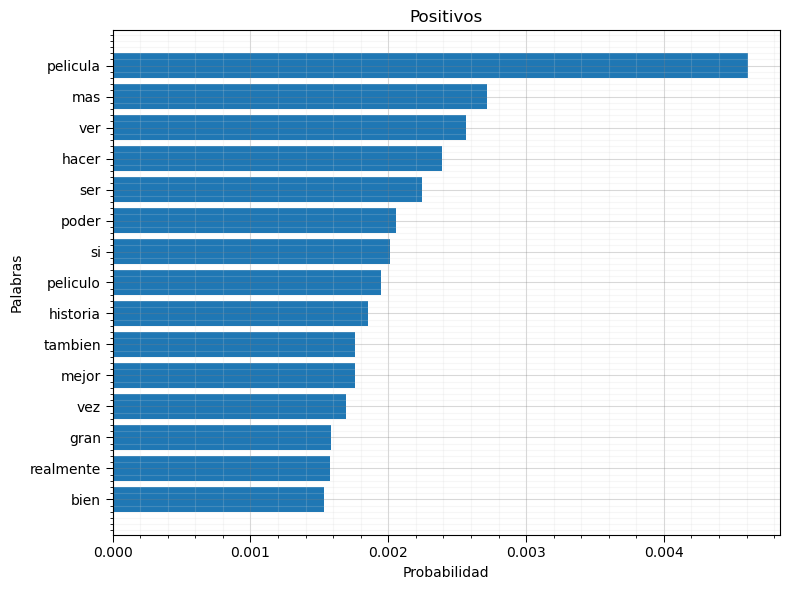

In [52]:
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.barh(words_dic_1.index[:15], words_dic_1['Positivos'][:15])
formato_grafica(ax1, 'Positivos', 'Probabilidad', 'Palabras')
plt.gca().invert_yaxis()
#plt.savefig('./imagenes/positivos_bar.svg')

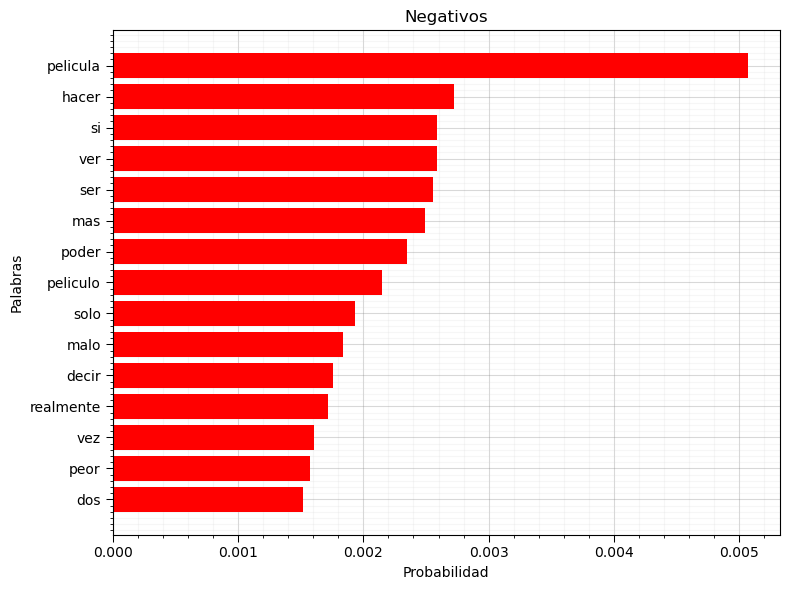

In [53]:
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.barh(words_dic_2.index[:15], words_dic_2['Negativos'][:15], color='r')
formato_grafica(ax2, 'Negativos','Probabilidad', 'Palabras')

plt.gca().invert_yaxis()
#plt.savefig('./imagenes/negativos_bar.svg')

#### 3.4.2. Cualitativo 

In [54]:
# Número de features por cada clase
num_feat = model_m.feature_count_
num_feat

array([[2.6031988 , 0.81823794, 1.860483  , ..., 1.27562844, 0.32534692,
        0.431688  ],
       [3.4963399 , 1.14993472, 1.84359971, ..., 1.16766475, 0.70317601,
        0.22202413]])

In [55]:
words_1 = dict(zip(variables.tolist(), num_feat[0].tolist()))
words_1 = sorted(words_1.items(), key=lambda x:x[1],reverse=True)
words_1 = dict(words_1)

words_2 = dict(zip(variables.tolist(), num_feat[1].tolist()))
words_2= sorted(words_2.items(), key=lambda x:x[1], reverse=True)
words_2 = dict(words_2)

dic_1 = {'Positivos': words_1.values()}
dic_2 = {'Negativos':words_2.values()}

words_dic_1 = pd.DataFrame.from_dict(dic_1)
words_dic_1.index = list(words_1.keys())

words_dic_2 = pd.DataFrame.from_dict(dic_2)
words_dic_2.index = list(words_2.keys())
words_dic_1.head()


,Positivos
pelicula,101.102055
mas,59.027667
ver,55.592850
hacer,51.759832
ser,48.481445


In [56]:
words_dic_2.head()

,Negativos
pelicula,111.348155
hacer,59.162347
si,56.180002
ver,56.119827
ser,55.364856


In [57]:
words_1 = dict(zip(variables.tolist(), num_feat[0].tolist()))
words_1 = sorted(words_1.items(), key=lambda x:x[1])
words_1 = dict(words_1)

words_2 = dict(zip(variables.tolist(), num_feat[1].tolist()))
words_2= sorted(words_2.items(), key=lambda x:x[1])
words_2 = dict(words_2)

dic_1 = {'Positivos': words_1.values()}
dic_2 = {'Negativos':words_2.values()}

words_dic_1 = pd.DataFrame.from_dict(dic_1)
words_dic_1.index = list(words_1.keys())

words_dic_2 = pd.DataFrame.from_dict(dic_2)
words_dic_2.index = list(words_2.keys())
words_dic_1.head()


,Positivos
abismal,0.0
antologia,0.0
apestoso,0.0
arrojo,0.0
babosa,0.0


In [58]:
no_positivo = " ".join(words_dic_1[words_dic_1['Positivos']==0.0].index.tolist())
no_positivo

'abismal antologia apestoso arrojo babosa barney barril basinger bert bey bigfoot bodo bofetado boll bostezo carlyle cesta chaber cheech cliched coffy cohete come cristianismo dahmer delia despierto diane ebert estante excusar exorcista fane finalizar financiar flanner gamera gardner ghouli hack ibm ilogico imbecil inane inapropiado incoherente incomprensible inexacto inodoro juramento kasparov kid lata libra maddy madsen mantente michaels norri norris oldboy palermo pam pavo pin pokemon porter powers preguntandome pulpo ramgopal raptor remotamente rencor savage scooby segal sentarme sheila shot spencer swope tensa teri tibio tintin tortuga trillado uwe vanguardia varmar verificar videocamar wai wench wheeler yeti zar zoey'

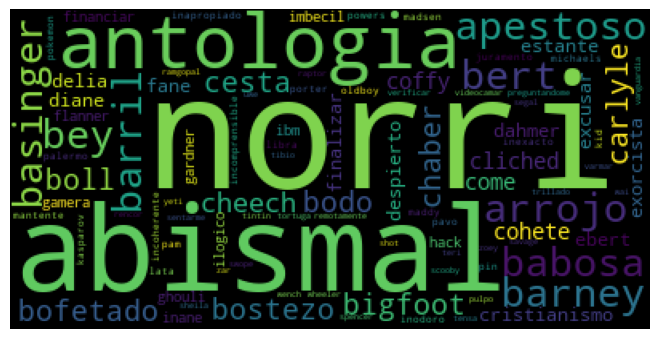

In [59]:
from wordcloud import WordCloud
word_cloud = WordCloud().generate(no_positivo)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('./imagenes/no_positivos.svg')
plt.show()

In [60]:
positivo = " ".join(words_dic_2[words_dic_2['Negativos']==0.0].index.tolist())
positivo

'anhelar argentino aspero atlantis bakshi barbra barrymore beauchamp binodini bosques brashear bruno burke burtynsky byn cage calificaciones cassavet cerdo champlain chavez christy cinema clampett clouzot cole comica complementar connery creación crouse dandy dark davi delicado deliciosamente deliciós determinacion devito discreto disfruta dudley duff edie emory encuentre enganche equilibrado evelyn evie evocador evolucionar existenz fabrica fahey fascista fassbinder faulkner felix fido foxx fuller funerario gannon garbo gino goldsworthy golf gomez haines harrison hector henson hilary homer homicidio ibm impredecible inconveniente invasor irenar jabba jesse jonathan jonathon jouvet kasparov kermit kurt kyle leland lemmon lupino magistralmente mathieu matthau mixto miyazaki monkey monroe monás nacion nancy nanette nathaniel nervioso newcombe nostalgico notre oberon optimista palermo patho pezón phoebe pickup pintoresco poirot poitier porter ramsey recluso reflexion richardson rockne ror

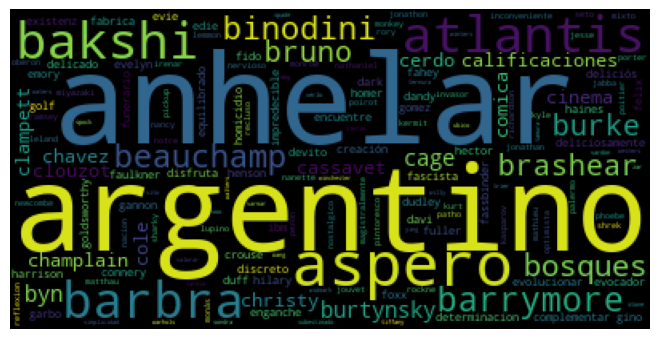

In [61]:
from wordcloud import WordCloud
word_cloud = WordCloud().generate(positivo)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('./imagenes/positivos.svg')
plt.show()

### 3.4. Generación de Pipeline

In [62]:
pipeline_m = Pipeline(steps=[('vectorize', TfidfVectorizer()),
                        ('classifier', MultinomialNB())])

In [63]:
parameters_m = {'classifier__alpha': np.linspace(1, 1.5, 100).tolist(),
                'classifier__fit_prior': [True, False]}
grid_search_m= GridSearchCV(pipeline_m, parameters_m, cv=20, scoring='accuracy', n_jobs=-1)
grid_search_m.fit(X_train, y_train)
print("Mejor modelo:", grid_search_m.best_estimator_)
print("Mejores parámetros:", grid_search_m.best_params_)
print("Mejor puntuación en entrenamiento:", grid_search_m.best_score_)

Mejor modelo: Pipeline(steps=[('vectorize', TfidfVectorizer()),
                ('classifier', MultinomialNB(alpha=1.378787878787879))])
Mejores parámetros: {'classifier__alpha': 1.378787878787879, 'classifier__fit_prior': True}
Mejor puntuación en entrenamiento: 0.8434523809523811


In [64]:
model_m  = grid_search_m.best_estimator_
m = model_m['classifier'].fit(train_X_Tfidf_m.toarray(), y_train)
m.get_params()


{'alpha': 1.378787878787879, 'class_prior': None, 'fit_prior': True}

In [65]:
m.score(train_X_Tfidf_m.toarray(),y_train)

0.9321428571428572

In [66]:
m.score(test_X_Tfidf_m.toarray(),y_test)

0.8334489937543372

## 4. Modelo de Red Neuronal


### 4.1. Vectorización de palabras

In [67]:
tfidf_vect_rn = TfidfVectorizer(max_features=10000)
tfidf_vect_rn.fit(X_data)

TfidfVectorizer(max_features=10000)

In [68]:
train_X_Tfidf_rn= tfidf_vect_rn.transform(X_train)
test_X_Tfidf_rn = tfidf_vect_rn.transform(X_test)

In [69]:
print(tfidf_vect_rn.vocabulary_)

{'si': 8604, 'buscar': 1379, 'pelicula': 7027, 'guerra': 4532, 'tipico': 9237, 'asi': 776, 'nota': 6626, 'aficionados': 231, 'aunque': 897, 'tratar': 9383, 'personaje': 7114, 'ruso': 8251, 'segundo': 8452, 'mundial': 6462, 'esperar': 3650, 'ver': 9646, 'ningun': 6590, 'nazi': 6531, 'canon': 1512, 'sangre': 8352, 'etc': 3766, 'peliculo': 7030, 'persona': 7112, 'causar': 1636, 'luchar': 5893, 'ser': 8517, 'ordinario': 6813, 'ocurrir': 6722, 'elección': 3259, 'hacer': 4588, 'cinematografia': 1795, 'escrituro': 3593, 'diez': 2947, 'perfecto': 7084, 'aqui': 664, 'duda': 3154, 'apreciara': 630, 'incluso': 4979, 'probablemente': 7455, 'amar': 444, 'hablar': 4582, 'busque': 1383, 'version': 9675, 'dvd': 3179, 'cinema': 1793, 'tener': 9152, 'subtitulo': 8908, 'catorce': 1632, 'idioma': 4872, 'diferente': 2950, 'doblaje': 3075, 'ingl': 5081, 'dirio': 2996, 'igual': 4882, 'bueno': 1351, 'supuesto': 8995, 'pista': 7201, 'original': 6828, 'cosa': 2286, 'perder': 7068, 'traduccion': 9330, 'sino': 86

### 4.2. Modelo Red Neuronal

In [70]:
# Modelo Red Neuronal 
def create_model(neurons1=1, neurons2=1, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(neurons1, input_dim=train_X_Tfidf_rn.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# crear el modelo para GridSearchCV
rn = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=0, neurons1=1, neurons2=1, dropout_rate=0.0)

In [71]:
# Busqueda de mejores parámetros por cuadricula
parameters_rn = {'neurons1': [4, 8, 16, 32, 64],
                 'neurons2': [4, 8, 16, 32, 64],
                 'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}

grid_search_rn= GridSearchCV(estimator=rn, param_grid=parameters_rn, cv=3, scoring='accuracy', n_jobs=-1)     
grid_search_rn.fit(train_X_Tfidf_rn, y_train)
    
print("Mejor modelo:", grid_search_rn.best_estimator_)
print("Mejores parámetros:", grid_search_rn.best_params_)
print("Mejor puntuación en entrenamiento:", grid_search_rn.best_score_)

C:\Users\stild\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejor modelo: KerasClassifier(
	model=<function create_model at 0x000001FB1E808E50>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	neurons1=4
	neurons2=8
	dropout_rate=0.2
	class_weight=None
)
Mejores parámetros: {'dropout_rate': 0.2, 'neurons1': 4, 'neurons2': 8}
Mejor puntuación en entrenamiento: 0.8395833333333332


In [72]:
# Definir mejor modelo 
model_rn = grid_search_rn.best_estimator_
rn = model_rn.fit(train_X_Tfidf_rn, y_train)
rn.get_params()

{'model': <function __main__.create_model(neurons1=1, neurons2=1, dropout_rate=0.0)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': 'rmsprop',
 'loss': None,
 'metrics': None,
 'batch_size': 32,
 'validation_batch_size': None,
 'verbose': 0,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 10,
 'neurons1': 4,
 'neurons2': 8,
 'dropout_rate': 0.2,
 'class_weight': None}

In [73]:
model_rn.score(train_X_Tfidf_rn,y_train)

0.999702380952381

In [74]:
model_rn.score(test_X_Tfidf_rn,y_test)

0.8501040943789036

### 4.3. Análisis de resultados


#### 4.3.1. Analísis cualitativo

In [75]:
variables = tfidf_vect_rn.get_feature_names_out()
variables

array(['aag', 'aar', 'abajo', ..., 'zu', 'zucco', 'zumbido'], dtype=object)

In [76]:
# Número de caracteristas positivas por clase

pos = dict(zip(variables.tolist(), num_feat[0].tolist()))
pos = sorted(pos.items(), key=lambda x:x[1],reverse=True)
pos = dict(pos)

dic_pos = {'Positivos': pos.values()}

palabras_dic_pos = pd.DataFrame.from_dict(dic_pos)
palabras_dic_pos.index = list(pos.keys())

palabras_dic_pos.head()


,Positivos
hamlet,101.102055
fabrica,59.027667
mirada,55.592850
dino,51.759832
kung,48.481445


In [77]:
# Número de caracteristas negativas por clase

neg = dict(zip(variables.tolist(), num_feat[1].tolist()))
neg = sorted(neg.items(), key=lambda x:x[1], reverse=True)
neg = dict(neg)

dic_neg = {'Negativos':neg.values()}

palabras_dic_neg = pd.DataFrame.from_dict(dic_neg)
palabras_dic_neg.index = list(neg.keys())

palabras_dic_neg.head()

,Negativos
hamlet,111.348155
dino,59.162347
larry,56.180002
mirada,56.119827
kung,55.364856


#### 4.3.1. Analísis cuantitativo - pesos

In [78]:
# Extraer conjunto de capas
model = model_rn.model()

In [79]:
# Obtener los pesos de la última capa
pesos = model.layers[0].get_weights()[0]

# Obtener las palabras del vector
variables = tfidf_vect_rn.get_feature_names_out()

In [80]:
# Crear dos diccionarios de palabras y pesos para cada sentimiento
pos_variable_pesos = {}
neg_variable_pesos = {}
for palabra, peso in zip(variables, pesos):
    if peso > 0:
        pos_variable_pesos[palabra] = peso
    else:
        neg_variable_pesos[palabra] = peso

# Ordenar los diccionarios por peso descendente y tomar las primeras 10 palabras
top_pos_palabras = sorted(pos_variable_pesos.items(), key=lambda x: x[1], reverse=True)[:5]
top_neg_palabras = sorted(neg_variable_pesos.items(), key=lambda x: x[1])[:5]

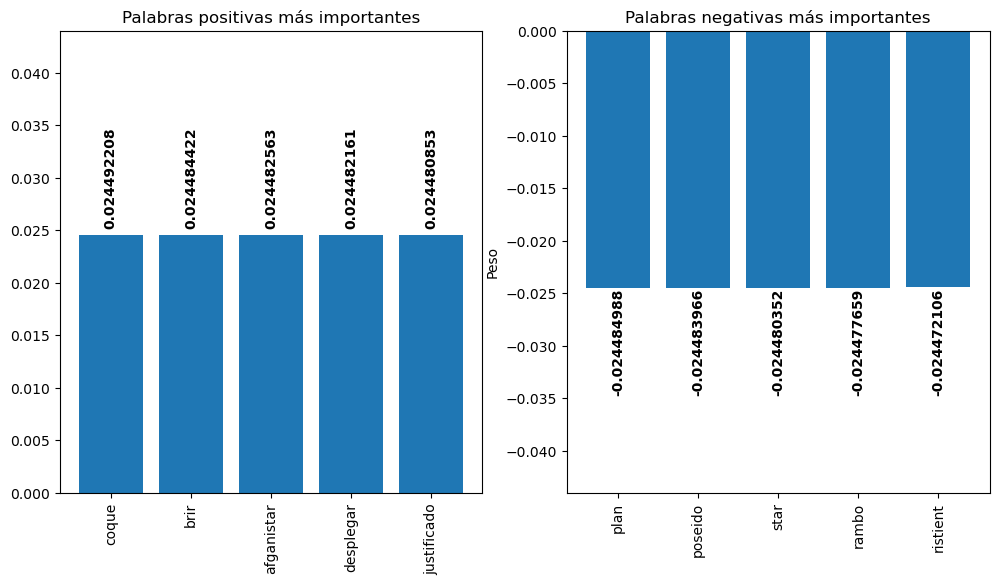

In [81]:

# Graficar las palabras más importantes en un diagrama de barras
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

def palabras_positivas():
    pos_palabras = [w[0] for w in top_pos_palabras]
    pos_pesos = [round(float(w[1]), 9) for w in top_pos_palabras]

    ax1.bar(pos_palabras, pos_pesos)
    ax1.set_title('Palabras positivas más importantes')
    ax2.set_ylabel('Peso')
    ax1.set_ylim([0.0, 0.044])
    ax1.tick_params(axis='x', rotation=90)
    
    for i, v in enumerate(pos_pesos):
        ax1.text(i, v+0.001, str(v), color='black', fontweight='bold', rotation=90, ha='center')

def palabras_negativas():
    neg_palabras = [w[0] for w in top_neg_palabras]
    neg_pesos = [round(float(w[1]), 9) for w in top_neg_palabras]
    
    ax2.bar(neg_palabras, neg_pesos)
    ax2.set_ylabel('Peso')
    ax2.set_title('Palabras negativas más importantes')
    ax2.set_ylim([0.0, -0.044])
    ax2.invert_yaxis()
    ax2.tick_params(axis='x', rotation=90)
    
    for i, v in enumerate(neg_pesos):
        ax2.text(i, v-0.01, str(v), color='black', fontweight='bold', rotation=90, ha='center')

# Mostrar palabras positivas que más inciden en la red
palabras_positivas()
# Mostrar palabras negativas que más inciden en la red
palabras_negativas()
  
plt.show()

### 4.4. Generación de pipeline


In [82]:
# Modelo Red Neuronal 
def create_model_pipeline(alpha=0.1, fit_prior=True, neurons1=1, neurons2=1, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(neurons1, input_dim=train_X_Tfidf_rn.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# crear el modelo para GridSearchCV
rn = KerasClassifier(model=create_model_pipeline, epochs=10, batch_size=32, verbose=0, alpha=0.1, fit_prior=True, neurons1=1, neurons2=1, dropout_rate=0.0)

In [83]:
pipeline_rn = Pipeline(steps=[('vectorize', TfidfVectorizer(max_features=10000)),
                        ('classifier', rn)])

In [84]:
parameters_rn = {'neurons1': [4, 8, 16, 32, 64],
                 'neurons2': [4, 8, 16, 32, 64],
                 'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
grid_search_rn= GridSearchCV(pipeline_rn, parameters_m, cv=20, scoring='accuracy', n_jobs=-1)
grid_search_rn.fit(X_train, y_train)
print("Mejor modelo:", grid_search_rn.best_estimator_)
print("Mejores parámetros:", grid_search_rn.best_params_)
print("Mejor puntuación en entrenamiento:", grid_search_rn.best_score_)

Mejor modelo: Pipeline(steps=[('vectorize', TfidfVectorizer(max_features=10000)),
                ('classifier',
                 KerasClassifier(alpha=1.297979797979798, batch_size=32, dropout_rate=0.0, epochs=10, fit_prior=False, model=<function create_model_pipeline at 0x000001FB2048A820>, neurons1=1, neurons2=1, verbose=0))])
Mejores parámetros: {'classifier__alpha': 1.297979797979798, 'classifier__fit_prior': False}
Mejor puntuación en entrenamiento: 0.730952380952381


In [85]:
grid_search_rn.score(X_train,y_train)

0.981547619047619

In [86]:
grid_search_rn.score(X_test,y_test)

0.8001387925052047

## 5. Modelo Regresión logística


### 5.1. Vectorización de palabras

In [87]:
tfidf_vect_a = TfidfVectorizer(max_features=3000)
tfidf_vect_a.fit(X_data)

TfidfVectorizer(max_features=3000)

In [88]:
train_X_Tfidf_a = tfidf_vect_a.transform(X_train)
test_X_Tfidf_a = tfidf_vect_a.transform(X_test)

In [89]:
print(tfidf_vect_a.vocabulary_)

{'si': 2595, 'buscar': 356, 'pelicula': 2111, 'guerra': 1346, 'tipico': 2781, 'asi': 217, 'nota': 1958, 'aunque': 244, 'tratar': 2834, 'personaje': 2146, 'ruso': 2493, 'segundo': 2548, 'mundial': 1900, 'esperar': 1107, 'ver': 2908, 'ningun': 1941, 'nazi': 1928, 'canon': 402, 'sangre': 2519, 'etc': 1138, 'peliculo': 2114, 'persona': 2144, 'causar': 449, 'luchar': 1723, 'ser': 2571, 'ordinario': 2034, 'ocurrir': 2001, 'hacer': 1372, 'cinematografia': 498, 'escrituro': 1079, 'diez': 871, 'perfecto': 2135, 'aqui': 186, 'duda': 943, 'incluso': 1476, 'probablemente': 2253, 'amar': 121, 'hablar': 1368, 'version': 2918, 'dvd': 950, 'tener': 2748, 'subtitulo': 2678, 'catorce': 447, 'idioma': 1440, 'diferente': 874, 'ingl': 1504, 'dirio': 890, 'igual': 1445, 'bueno': 354, 'supuesto': 2704, 'pista': 2174, 'original': 2038, 'cosa': 661, 'perder': 2129, 'traduccion': 2817, 'sino': 2617, 'buena': 353, 'ir': 1558, 'revisar': 2445, 'especialmente': 1097, 'estudiar': 1132, 'cualquiera': 696, 'aspecto':

### 5.2. Modelo Regresión logística

In [90]:
#busqueda de parametros
import time
# Importamos las bibliotecas necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
param_grid = {
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
              'tol': [0.0001, 0.001, 0.01]

}
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(train_X_Tfidf_a, y_train)
best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_lr = LogisticRegression()
start_time = time.time()
best_lr.fit(train_X_Tfidf_a, y_train)
end_time = time.time()
y_pred = best_lr.predict(test_X_Tfidf_a)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Tiempo de ajuste: %s segundos" % (end_time - start_time))

Best parameters: {'solver': 'liblinear', 'tol': 0.0001}
Accuracy: 0.8480222068008327
Tiempo de ajuste: 0.023460865020751953 segundos


In [91]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, best_lr.predict(train_X_Tfidf_a))
print("Accuracy Modelo Entrenamiento:", accuracy_train)
print("Accuracy Datos de prueba:", accuracy_test)

Accuracy Modelo Entrenamiento: 0.9357142857142857
Accuracy Datos de prueba: 0.8480222068008327


In [92]:
print('Exactitud: %.4f' % accuracy_score(y_test, y_pred))
print("Recall: {}".format(recall_score(y_test,y_pred)))
print("Precisión: {}".format(precision_score(y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred)))

Exactitud: 0.8480
Recall: 0.837874659400545
Precisión: 0.8601398601398601
Puntuación F1: 0.8488612836438922


### 5.3. Analísis de resultados

In [93]:
variables = tfidf_vect_a.get_feature_names_out()
print(variables)

['abajo' 'abandonado' 'abandonar' ... 'zombie' 'zombies' 'zona']


In [94]:
#compruebo los coeficientes y si dimension 
num_feat = best_lr.coef_[0]
print(num_feat)

[ 0.12105419  0.16586169 -0.00450925 ...  0.33032978  0.17433104
 -0.01816906]


<BarContainer object of 20 artists>

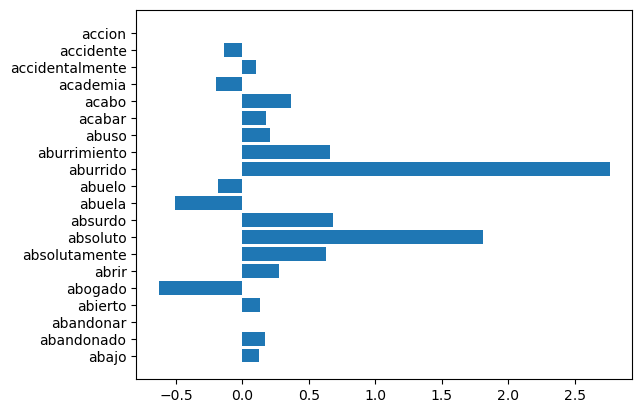

In [95]:
#primeras 20 palabras y sus coeficientes
plt.barh(variables[:20], best_lr.coef_[0][:20])

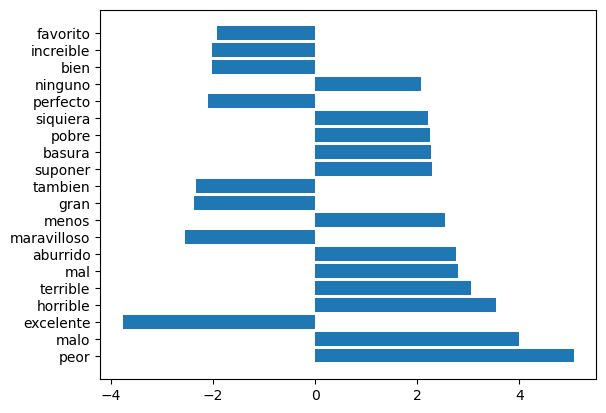

In [96]:
#seleccionar las 20 palabras que mas impacto tienen en la regresion
coef_tuples = sorted(zip(variables, best_lr.coef_[0]), key=lambda x: abs(x[1]), reverse=True)

# Seleccionar las 20 palabras con mayor coeficiente
top_coef = coef_tuples[:20]

# Crear una lista de las palabras y los coeficientes correspondientes
words = [x[0] for x in top_coef]
coeficients = [x[1] for x in top_coef]

# Crear el gráfico de barras
plt.barh(words, coeficients)
plt.show()

Entre menor el numero asignado mayor el impacto de la palabra para que la review sea positiva

### 5.4. Generación de pipeline

In [97]:
pipeline_lr = Pipeline(steps=[('vectorize', TfidfVectorizer(max_features=3000)),
                        ('lr', LogisticRegression())])

In [98]:
lr = LogisticRegression()
param_grid = {
                
              'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
              'lr__tol': [0.0001, 0.001, 0.01]
}

grid_search_lr = GridSearchCV(pipeline_lr, param_grid, cv=5)
grid_search_lr.fit(X_train, y_train)
print("Mejor modelo:", grid_search_lr.best_estimator_)
print("Mejores parámetros:", grid_search_lr.best_params_)
print("Mejor puntuación en entrenamiento:", grid_search_lr.best_score_)

Mejor modelo: Pipeline(steps=[('vectorize', TfidfVectorizer(max_features=3000)),
                ('lr', LogisticRegression(solver='liblinear', tol=0.01))])
Mejores parámetros: {'lr__solver': 'liblinear', 'lr__tol': 0.01}
Mejor puntuación en entrenamiento: 0.8422619047619048


In [99]:
print("pipeline datos de entrenamiento",grid_search_lr.score(X_train,y_train))
print("pipeline datos de prueba",grid_search_lr.score(X_test,y_test))

pipeline datos de entrenamiento 0.9360119047619048
pipeline datos de prueba 0.8487161693268563


In [100]:
best_model = grid_search_lr.best_estimator_
pipeline = best_model.fit(X_train,y_train)
pipeline

Pipeline(steps=[('vectorize', TfidfVectorizer(max_features=3000)),
                ('lr', LogisticRegression(solver='liblinear', tol=0.01))])

In [101]:
# Guardar modelo
filename = 'pipeline_logisticRegression.joblib'

dump(pipeline, filename)

['pipeline_logisticRegression.joblib']

## 6. Número de caracteres con arboles de decisión

### 6.1. Selección de campos

In [102]:
df_data['sentimiento'] = df_data['sentimiento'].astype('int64')

In [103]:
number_cols = df_data.dtypes[(df_data.dtypes == np.int64) | (df_data.dtypes == np.float64)].index 
number_cols = df_data.select_dtypes(include = ['int64','float', 'int']).columns
number_cols

Index(['sentimiento', 'Conteo', 'Max', 'Min'], dtype='object')

In [104]:
# Paso 2: Pasar a binario
df_data = changeValues(df_data, 'sentimiento', 'positivo', 0)
df_data = changeValues(df_data, 'sentimiento', 'negativo', 1)
df_data.head(2)

,review_es,sentimiento,Conteo,Max,Min,Language,palabras,Moda
0,Si está buscando una película de guerra típica...,0,1104,15,1,es,si buscar pelicula guerra tipico asi nota afic...,pelicula
1,Supongo que algunos directores de películas de...,0,1280,16,1,es,suponer director peliculas lujo sentado buscar...,


In [105]:
df_data_m = df_data[number_cols]
df_data_m.head()

,sentimiento,Conteo,Max,Min
0,0,1104,15,1
1,0,1280,16,1
2,0,876,17,1
3,0,1446,16,1
4,0,738,11,1


In [106]:
X = df_data_m.drop(['sentimiento'], axis=1)
X = X.drop(['Min'], axis=1)
Y = df_data_m['sentimiento']

In [107]:
# Paso 3: Dividir el conjunto de datos  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

### 6.2. Modelo árbol de decisión 

In [113]:
arbol = DecisionTreeClassifier(random_state=0)

In [114]:
parameters_t = {'criterion':['gini', 'entropy'],
              'max_depth': np.arange(9,20).tolist(),
              'min_samples_split':[2, 3, 4, 5],
              'splitter': ['random', 'best'],
              'max_features': ['auto', 'sqrt','log2']}
# GridSearch realizando las particiones de la validación cruzada
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)
grid_search_t = GridSearchCV(arbol, parameters_t, cv=particiones, n_jobs=-1)
grid_search_t = grid_search_t.fit(X_train, y_train) 

In [115]:
#Print The value of best Hyperparameters
grid_search_t.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [116]:
tree_best = grid_search_t.best_estimator_
tree_best = tree_best.fit(X_train, y_train) 
y_pred = tree_best.predict(X_test) 

print('Exactitud: %.2f' % accuracy_score(y_test, y_pred))
print("Recall: {}".format(recall_score(y_test,y_pred)))
print("Precisión: {}".format(precision_score(y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred)))

Exactitud: 0.52
Recall: 0.494550408719346
Precisión: 0.5330396475770925
Puntuación F1: 0.5130742049469964


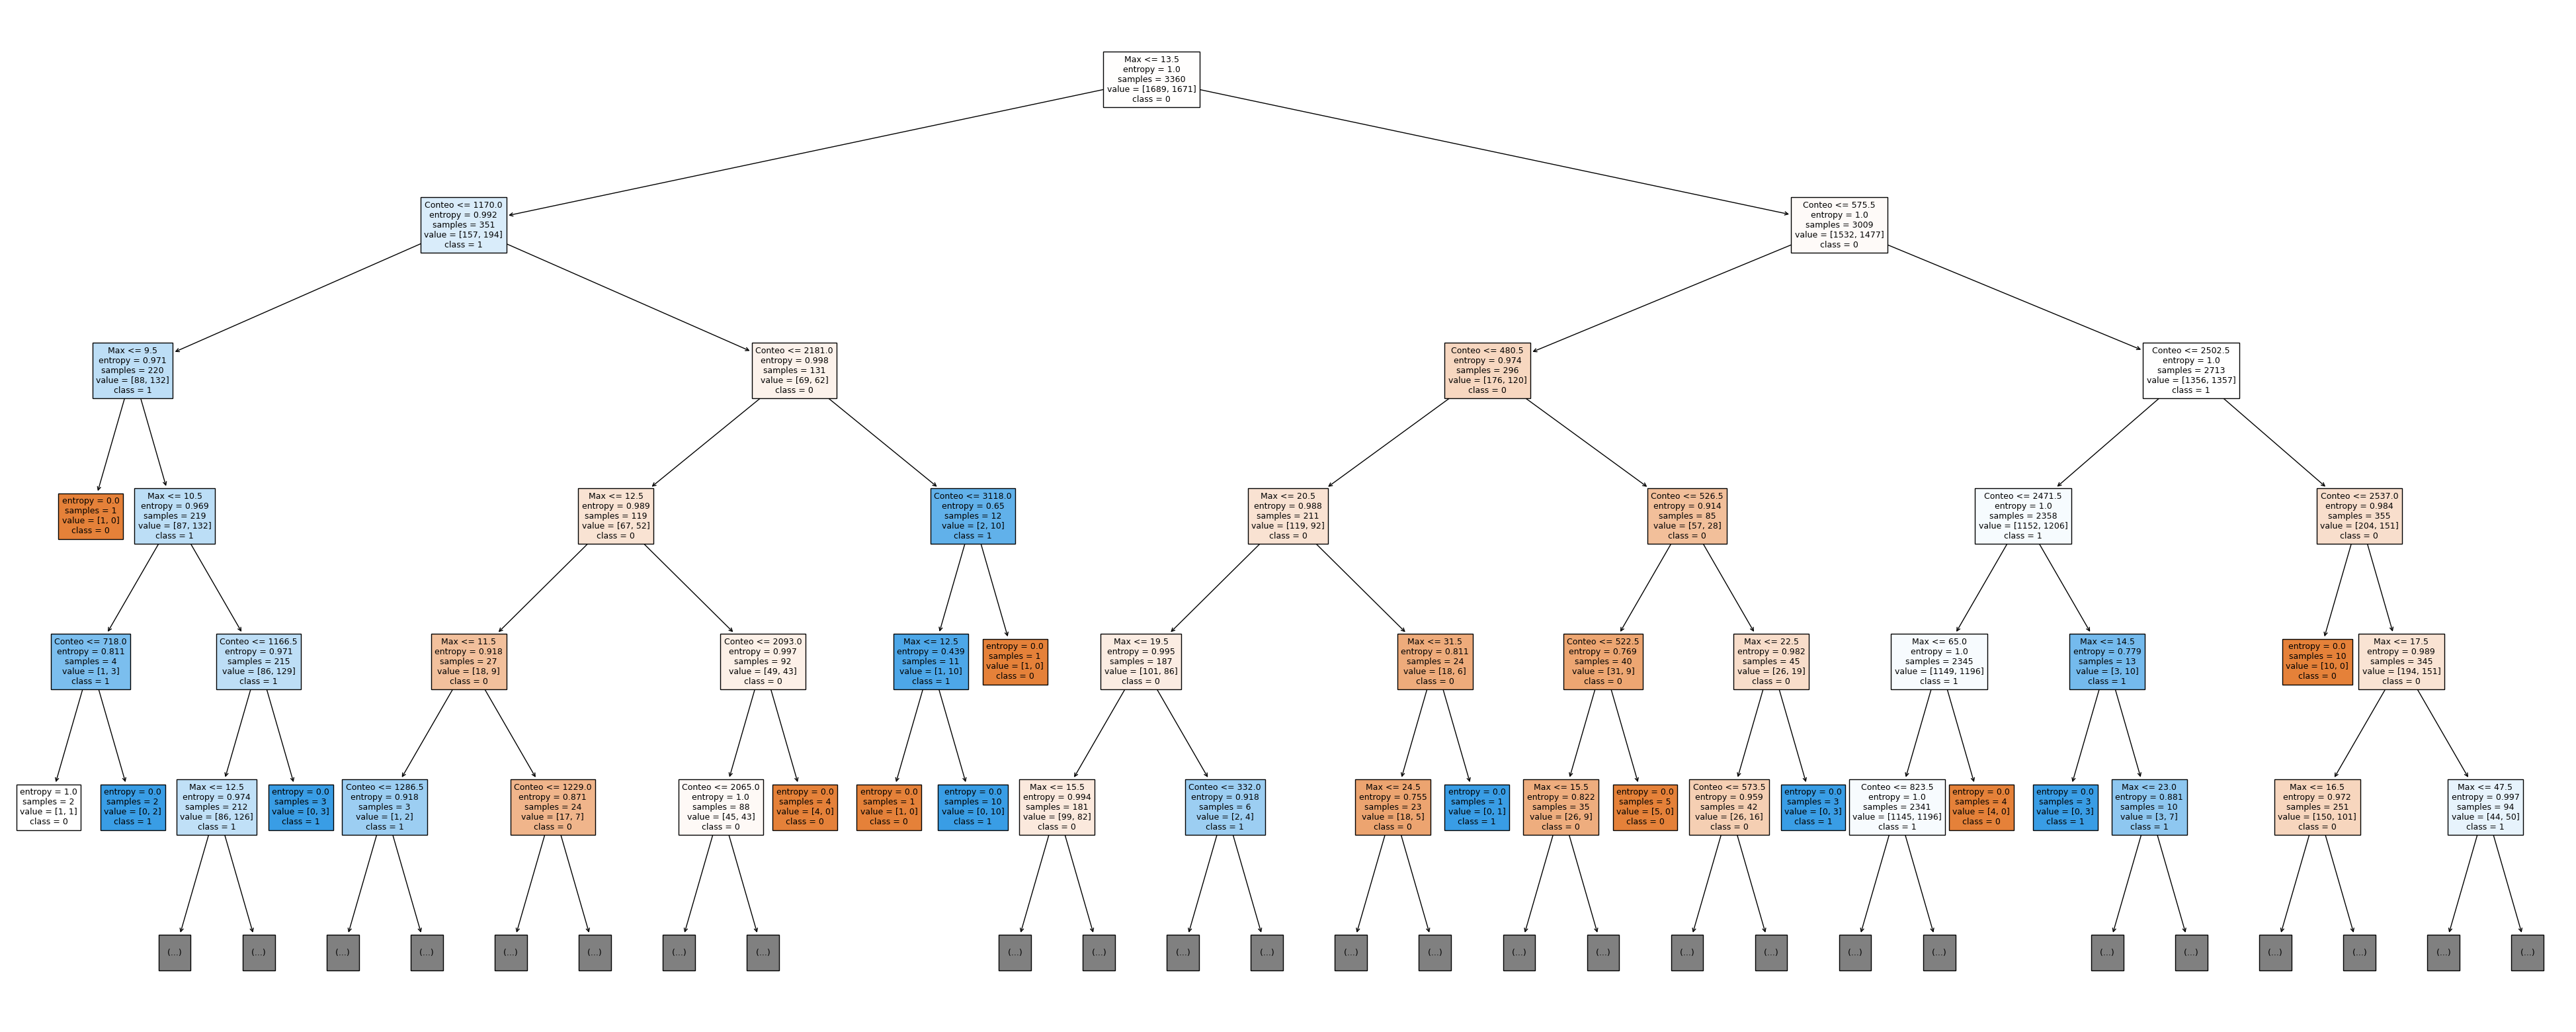

In [117]:
fig = plt.figure(figsize=(50,20))
from sklearn import tree
_ = tree.plot_tree(tree_best, max_depth=5, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)
fig.savefig('./imagenes/decision_tree.svg')

## 7. Conclusión de algoritmos

In [139]:

# Algoritmos
algorithms = ['MultinomialDB', 'Red Neuronal', 'Regresión logística']

# scores de entrenamiento
train_scores = [0.9315476190476191, 0.999702380952381, 0.9357142857142857]

# Scores de prueba
test_scores = [0.8313671061762665, 0.8501040943789036, 0.8480222068008327]

# Creación de tabla
df = pd.DataFrame({'Algoritmo': algorithms, 'Score en Entrenamiento': train_scores, 'Score en Prueba': test_scores})
df = df.sort_values(by=['Score en Prueba'], ascending=False).reset_index(drop=True)
df_styled = df.style \
    .highlight_max(subset=['Score en Entrenamiento', 'Score en Prueba'], color='green') \
    .set_properties(**{'text-align': 'center', 'font-size': '16px'}) \
.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

display(df_styled)

,Algoritmo,Score en Entrenamiento,Score en Prueba
0,Red Neuronal,0.999702,0.850104
1,Regresión logística,0.935714,0.848022
2,MultinomialDB,0.931548,0.831367


Note que el color verde indica los puntajes mayores en entrenamiento y prueba dependiendo del algoritmo. En conclusión, se puede evidenciar que el mayor puntaje sobre el entrenamiento fue 0.999702 y sobre el test fue 0.850104 en el algoritmo de Red Neuronal. 

## 8. Datos Test

### 8.1. Carga de datos 

In [119]:
# Paso 1: Carga de los datos 
data_p = pd.read_csv('./Datos/MovieReviewsPruebas.csv', sep=',')
data_p.head()

,Unnamed: 0,review_es
0,0,La saga medieval alemana de Fritz Lang continú...
1,1,Este anime es una visita obligada para los fan...
2,2,Esta es una de las mejores películas para masc...
3,3,"Cuando se lanzó su DVD, llegué al mercado y lo..."
4,4,No me he reído tan duro en una película en muc...


Encontradas las filas y las columnas se elimina la columna Unnamed ya que esta no afecta el modelo de clasificación.

In [120]:
data_p = del_id_column(data_p)
data_p.head()

,review_es
0,La saga medieval alemana de Fritz Lang continú...
1,Este anime es una visita obligada para los fan...
2,Esta es una de las mejores películas para masc...
3,"Cuando se lanzó su DVD, llegué al mercado y lo..."
4,No me he reído tan duro en una película en muc...


### 8.2. Perfilamiento y entendimiento de los datos 

In [121]:
# Paso 1: Dimensiones del DataFrame de pruebas

Filas_p = data_p.shape[0]
Columnas_p = data_p.shape[1]
Filas_p, Columnas_p

(300, 1)

In [122]:
# Paso 2: Evaluar la completitud de los datos
(data_p.isnull().sum() / Filas).sort_values(ascending = False)

review_es    0.0
dtype: float64

In [123]:
# Paso 3: Adjuntar al DataFrame las estadísticas descriptivas de cada fila
data_p['Conteo'] = [len(x) for x in data_p['review_es']]
data_p['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in data_p['review_es']]
data_p['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in data_p['review_es']]
data_p['Language'] = [detect(x) for x in data_p['review_es']]
data_p.head()

,review_es,Conteo,Max,Min,Language
0,La saga medieval alemana de Fritz Lang continú...,786,17,1,es
1,Este anime es una visita obligada para los fan...,1801,18,1,es
2,Esta es una de las mejores películas para masc...,778,14,1,es
3,"Cuando se lanzó su DVD, llegué al mercado y lo...",1132,13,1,es
4,No me he reído tan duro en una película en muc...,1060,15,1,es


In [124]:
# Paso 4: Identificar que cumpla con las restricciones del diccionario
data_p['Language'].value_counts()

es    284
en     16
Name: Language, dtype: int64

Para el conjunto de datos dados se encuentra que hay un porcentaje que no se encuentra en español com especifica el diccionario teniendo así que eliminarlo para que se cumpla lo dado por el negocio. 

In [125]:
# Paso 5: Eliminar las filas que no cumplen con las restricciones del negocio
data_p = delete_one(data_p, 'Language', 'en')

In [126]:
# Paso 6: Comprobación
data_p['Language'].value_counts()

es    284
Name: Language, dtype: int64

In [127]:
# Paso 7: Evaluar la unicidad/duplicidad de los datos
data_p.duplicated(subset = 'review_es', keep = False).sum()

0

Ya que no se tienen se quieren saber los valores estadísticos de cada columna del DataFrame

In [128]:
data_p.describe()

,Conteo,Max,Min
count,284.000000,284.000000,284.000000
mean,1412.802817,16.531690,1.007042
std,891.750823,3.061625,0.083770
min,245.000000,11.000000,1.000000
25%,795.250000,15.000000,1.000000
50%,1154.500000,16.000000,1.000000
75%,1728.000000,18.000000,1.000000
max,5264.000000,31.000000,2.000000


# 8.3. Preparación de los datos

Se definenen las funciones para el procesamiento de las palabras tokenizadas, entre estas:
1. Remover los caracteres que no sean ASCII.
2. Pasar todas las palabras a minúscula.
3. Remover la puntuación.
4. Reemplazar los números por su correspondiente textual.
5. Remover las stop_words o palabras vacías.  

In [129]:
# Paso 1: Se realiza la tokenización con las funciones anteriores
data_p['palabras'] = data_p['review_es'].apply(word_tokenize).apply(preprocessing)
data_p.head()

,review_es,Conteo,Max,Min,Language,palabras
0,La saga medieval alemana de Fritz Lang continú...,786,17,1,es,"[saga, medieval, alemana, fritz, lang, continu..."
1,Este anime es una visita obligada para los fan...,1801,18,1,es,"[anime, visita, obligada, fanaticos, evangelio..."
2,Esta es una de las mejores películas para masc...,778,14,1,es,"[mejores, peliculas, mascotas, ninos lloro, ca..."
3,"Cuando se lanzó su DVD, llegué al mercado y lo...",1132,13,1,es,"[lanzo, dvd, llegue, mercado, compre, creo, di..."
4,No me he reído tan duro en una película en muc...,1060,15,1,es,"[reido, tan, duro, pelicula, tiempo tengo, ir,..."


In [130]:
# Paso 3: Se encuentra la palabra que más se repite
data_p['Moda'] =  [Counter(x).most_common(1)[0][0] for x in data_p['palabras']]
data_p.head()

,review_es,Conteo,Max,Min,Language,palabras,Moda
0,La saga medieval alemana de Fritz Lang continú...,786,17,1,es,"[saga, medieval, alemana, fritz, lang, continu...",hagen
1,Este anime es una visita obligada para los fan...,1801,18,1,es,"[anime, visita, obligada, fanaticos, evangelio...",anime
2,Esta es una de las mejores películas para masc...,778,14,1,es,"[mejores, peliculas, mascotas, ninos lloro, ca...",
3,"Cuando se lanzó su DVD, llegué al mercado y lo...",1132,13,1,es,"[lanzo, dvd, llegue, mercado, compre, creo, di...",pelicula
4,No me he reído tan duro en una película en muc...,1060,15,1,es,"[reido, tan, duro, pelicula, tiempo tengo, ir,...",pelicula


In [131]:
# Paso 4: Se une el texto 
data_p['palabras'] = data_p['palabras'].apply(lambda x: ' '.join(map(str, x)))
data_p.head()

,review_es,Conteo,Max,Min,Language,palabras,Moda
0,La saga medieval alemana de Fritz Lang continú...,786,17,1,es,saga medieval alemana fritz lang continua die ...,hagen
1,Este anime es una visita obligada para los fan...,1801,18,1,es,anime visita obligada fanaticos evangelion tra...,anime
2,Esta es una de las mejores películas para masc...,778,14,1,es,mejores peliculas mascotas ninos lloro cada ve...,
3,"Cuando se lanzó su DVD, llegué al mercado y lo...",1132,13,1,es,lanzo dvd llegue mercado compre creo dinero ma...,pelicula
4,No me he reído tan duro en una película en muc...,1060,15,1,es,reido tan duro pelicula tiempo tengo ir proyec...,pelicula


In [132]:
data_p['palabras'] = data_p['palabras'].apply(stem_lematizer_words)


In [133]:
data_p['palabras'] = data_p['palabras'].apply(remove_stopwords)
data_p['palabras'] = data_p['palabras'].apply(lambda x: ' '.join(map(str, x)))
data_p.head()

,review_es,Conteo,Max,Min,Language,palabras,Moda
0,La saga medieval alemana de Fritz Lang continú...,786,17,1,es,saga medieval alemán fritz lang continuo die n...,hagen
1,Este anime es una visita obligada para los fan...,1801,18,1,es,anime visita obligado fanatico evangelion trab...,anime
2,Esta es una de las mejores películas para masc...,778,14,1,es,mejor pelicula mascota nino lloro cada vez ver...,
3,"Cuando se lanzó su DVD, llegué al mercado y lo...",1132,13,1,es,lanzo dvd llegar mercado compre creer dinero m...,pelicula
4,No me he reído tan duro en una película en muc...,1060,15,1,es,reido duro peliculo tiempo tener ir proyeccion...,pelicula


In [134]:
data_p['palabras'] = data_p['palabras'].apply(word_tokenize).apply(remove_stopwords)
data_p.head()

,review_es,Conteo,Max,Min,Language,palabras,Moda
0,La saga medieval alemana de Fritz Lang continú...,786,17,1,es,"[saga, medieval, alemán, fritz, lang, continuo...",hagen
1,Este anime es una visita obligada para los fan...,1801,18,1,es,"[anime, visita, obligado, fanatico, evangelion...",anime
2,Esta es una de las mejores películas para masc...,778,14,1,es,"[mejor, pelicula, mascota, nino, lloro, cada, ...",
3,"Cuando se lanzó su DVD, llegué al mercado y lo...",1132,13,1,es,"[lanzo, dvd, llegar, mercado, compre, creer, d...",pelicula
4,No me he reído tan duro en una película en muc...,1060,15,1,es,"[reido, duro, peliculo, tiempo, tener, ir, pro...",pelicula


In [135]:
data_p['palabras'] = data_p['palabras'].apply(lambda x: ' '.join(map(str, x)))
data_p.head()

,review_es,Conteo,Max,Min,Language,palabras,Moda
0,La saga medieval alemana de Fritz Lang continú...,786,17,1,es,saga medieval alemán fritz lang continuo die n...,hagen
1,Este anime es una visita obligada para los fan...,1801,18,1,es,anime visita obligado fanatico evangelion trab...,anime
2,Esta es una de las mejores películas para masc...,778,14,1,es,mejor pelicula mascota nino lloro cada vez ver...,
3,"Cuando se lanzó su DVD, llegué al mercado y lo...",1132,13,1,es,lanzo dvd llegar mercado compre creer dinero m...,pelicula
4,No me he reído tan duro en una película en muc...,1060,15,1,es,reido duro peliculo tiempo tener ir proyeccion...,pelicula


In [136]:
# Cargar el modelo
model2 = load(filename)

In [137]:
# Datos de prueba
x_predict_test = model2.predict(data_p['palabras'])
data_p['Sentimiento'] = x_predict_test
data_p.head()

,review_es,Conteo,Max,Min,Language,palabras,Moda,Sentimiento
0,La saga medieval alemana de Fritz Lang continú...,786,17,1,es,saga medieval alemán fritz lang continuo die n...,hagen,0
1,Este anime es una visita obligada para los fan...,1801,18,1,es,anime visita obligado fanatico evangelion trab...,anime,0
2,Esta es una de las mejores películas para masc...,778,14,1,es,mejor pelicula mascota nino lloro cada vez ver...,,0
3,"Cuando se lanzó su DVD, llegué al mercado y lo...",1132,13,1,es,lanzo dvd llegar mercado compre creer dinero m...,pelicula,0
4,No me he reído tan duro en una película en muc...,1060,15,1,es,reido duro peliculo tiempo tener ir proyeccion...,pelicula,0


In [138]:
data_p = changeValues(data_p, 'Sentimiento', 0, 'Positiva')
data_p = changeValues(data_p, 'Sentimiento', 1, 'Negativo')
data_p.head()

,review_es,Conteo,Max,Min,Language,palabras,Moda,Sentimiento
0,La saga medieval alemana de Fritz Lang continú...,786,17,1,es,saga medieval alemán fritz lang continuo die n...,hagen,Positiva
1,Este anime es una visita obligada para los fan...,1801,18,1,es,anime visita obligado fanatico evangelion trab...,anime,Positiva
2,Esta es una de las mejores películas para masc...,778,14,1,es,mejor pelicula mascota nino lloro cada vez ver...,,Positiva
3,"Cuando se lanzó su DVD, llegué al mercado y lo...",1132,13,1,es,lanzo dvd llegar mercado compre creer dinero m...,pelicula,Positiva
4,No me he reído tan duro en una película en muc...,1060,15,1,es,reido duro peliculo tiempo tener ir proyeccion...,pelicula,Positiva
